## Each ML method is characterized by design choices for: data representation/source, model and loss function.
## The code snippet below illustrates how changing the loss function, while using the same linear model, changes the statistical and computational properties of the resulting ML method.

LinReg Time: 0.0007660388946533203
HuberReg Time:  4.78  times Linreg time
Normalized deviation between model parameters LinReg 0.02
Normalized deviation between model parameters HuberReg 0.00


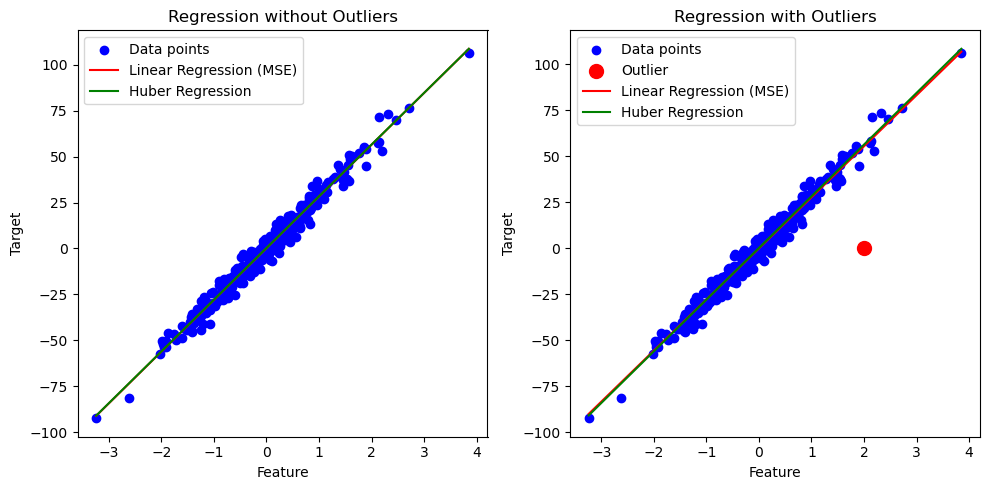

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, HuberRegressor, LogisticRegression
from sklearn.datasets import make_regression, make_classification
import time

# Create synthetic data for regression and classification
X_reg, y_reg = make_regression(n_samples=300, n_features=1, noise=4.0, random_state=42)
X_clf, y_clf = make_classification(n_samples=10, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, flip_y=0.1, class_sep=2, random_state=42)

# Add outliers
X_reg_outlier = np.vstack([X_reg, [[2]]])
y_reg_outlier = np.append(y_reg, [0])  # Outlier for regression

X_clf_outlier = np.vstack([X_clf, [[2]]])
y_clf_outlier = np.append(y_clf, [0])  # Outlier for classification

# Fit models without outliers
start = time.time()
lin_reg = LinearRegression().fit(X_reg, y_reg)
linregtime=time.time()-start
print("LinReg Time:", linregtime)
start = time.time()
huber_reg = HuberRegressor().fit(X_reg, y_reg)

huber_time = time.time() - start
ratio = huber_time / linregtime

print("HuberReg Time: ", '%.2f' % ratio, " times Linreg time")
log_reg = LogisticRegression().fit(X_clf, y_clf)

# Fit models with outliers
lin_reg_outlier = LinearRegression().fit(X_reg_outlier, y_reg_outlier)
huber_reg_outlier = HuberRegressor().fit(X_reg_outlier, y_reg_outlier)
log_reg_outlier = LogisticRegression().fit(X_clf_outlier, y_clf_outlier)

# Calculate the norm of the deviation between the parameters
coeff_diff = lin_reg.coef_ - lin_reg_outlier.coef_
intercept_diff = lin_reg.intercept_ - lin_reg_outlier.intercept_
# Compute the Euclidean norm of the differences
param_deviation_norm = np.sqrt(np.sum(coeff_diff ** 2) + intercept_diff ** 2)

# Compute the norm of the parameters from the model without outliers
lin_reg_norm = np.sqrt(np.sum(lin_reg.coef_ ** 2) + lin_reg.intercept_ ** 2)

# Normalize the deviation by the norm of the parameters without outliers
normalized_deviation = param_deviation_norm / lin_reg_norm

print("Normalized deviation between model parameters LinReg {:.2f}".format(normalized_deviation))

# Calculate the norm of the deviation between the parameters
coeff_diff = huber_reg.coef_ - huber_reg_outlier.coef_
intercept_diff = huber_reg.intercept_ - huber_reg_outlier.intercept_
# Compute the Euclidean norm of the differences
param_deviation_norm = np.sqrt(np.sum(coeff_diff ** 2) + intercept_diff ** 2)

# Compute the norm of the parameters from the model without outliers
huber_reg_norm = np.sqrt(np.sum(huber_reg.coef_ ** 2) + huber_reg.intercept_ ** 2)

# Normalize the deviation by the norm of the parameters without outliers
normalized_deviation = param_deviation_norm / lin_reg_norm

print("Normalized deviation between model parameters HuberReg {:.2f}".format(normalized_deviation))


# Generate predictions
x_range = np.linspace(X_reg_outlier.min(), X_reg_outlier.max(), 100).reshape(-1, 1)
y_lin_pred = lin_reg.predict(x_range)
y_huber_pred = huber_reg.predict(x_range)
y_lin_pred_outlier = lin_reg_outlier.predict(x_range)
y_huber_pred_outlier = huber_reg_outlier.predict(x_range)

x_range_clf = np.linspace(X_clf_outlier.min(), X_clf_outlier.max(), 300).reshape(-1, 1)
y_log_pred = log_reg.decision_function(x_range_clf)
y_log_pred_outlier = log_reg_outlier.decision_function(x_range_clf)

# Plotting the results for regression
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_reg, y_reg, color='blue', label='Data points')
plt.plot(x_range, y_lin_pred, color='red', label='Linear Regression (MSE)')
plt.plot(x_range, y_huber_pred, color='green', label='Huber Regression')
plt.title("Regression without Outliers")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_reg_outlier[:-1], y_reg_outlier[:-1], color='blue', label='Data points')
plt.scatter(X_reg_outlier[-1:], y_reg_outlier[-1:], color='red', label='Outlier', s=100)  # Outlier indicated
plt.plot(x_range, y_lin_pred_outlier, color='red', label='Linear Regression (MSE)')
plt.plot(x_range, y_huber_pred_outlier, color='green', label='Huber Regression')
plt.title("Regression with Outliers")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()



plt.tight_layout()
plt.show()


## We can use the linear model also to predict binary labels. A binary label takes on one out of two different values. For example y=0 or y=1. It turns out that binary classification requires a loss function different from squared error loss. 


[0 0 0 0 0 1 1 1 1 1]


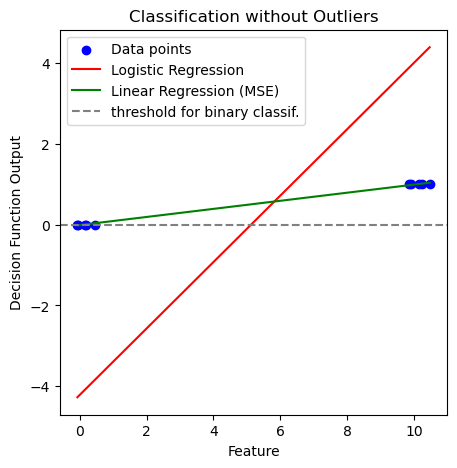

In [4]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples per class
n_samples = 5

# Generate features
features_0 = np.random.normal(loc=0, scale=0.3, size=n_samples)  # Features for y=0, centered around 0
features_1 = np.random.normal(loc=10, scale=0.3, size=n_samples)  # Features for y=1, centered around 10

# Combine features
features = np.concatenate([features_0, features_1])

# Generate labels
labels_0 = np.zeros(n_samples, dtype=int)  # Labels for y=0
labels_1 = np.ones(n_samples, dtype=int)  # Labels for y=1

# Combine labels
labels = np.concatenate([labels_0, labels_1])


X_clf = features.reshape(-1, 1)
y_clf = labels 

log_reg = LogisticRegression().fit(X_clf, y_clf)
lin_reg = LinearRegression().fit(X_clf,y_clf)

x_range_clf = np.linspace(X_clf.min(), X_clf.max(), 300).reshape(-1, 1)
y_log_pred = log_reg.decision_function(x_range_clf)

# Plotting the results for regression
plt.figure(figsize=(5, 5))

# Plotting the results for classification
plt.subplot(1, 1, 1)
plt.scatter(X_clf, y_clf, color='blue', label='Data points')
plt.plot(x_range_clf, y_log_pred, color='red', label='Logistic Regression')
plt.plot(x_range_clf, lin_reg.predict(x_range_clf), color='green', label='Linear Regression (MSE)')
plt.title("Classification without Outliers")
plt.xlabel("Feature")
plt.ylabel("Decision Function Output")
plt.axhline(0, color='gray', linestyle='--', label='threshold for binary classif.')
plt.legend()

plt.legend()

print(y_clf)

## We can use the linear model also for multi-class classification. Here we use a vector-valued linear map: y = W*x with some weight matrix W. Multi-class classification requires another class of loss functions, e.g., the multinomial loss function. 

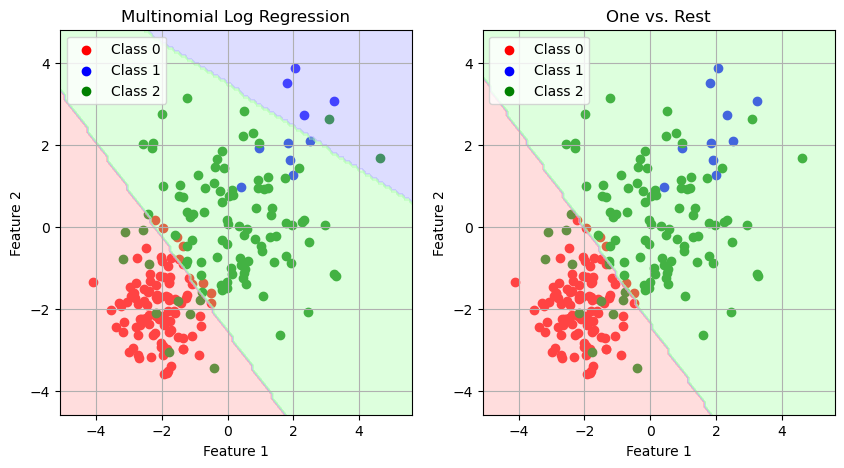

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Set random seed for reproducibility
np.random.seed(42)

# Generate data for each class
X0, _ = make_blobs(n_samples=100, centers=[[-2, -2]], cluster_std=0.8)
X1, _ = make_blobs(n_samples=10, centers=[[2, 2]], cluster_std=0.8)
X2, _ = make_blobs(n_samples=100, centers=[[0, 0]], cluster_std=1.5)

# Combine the datasets
X = np.vstack([X0, X1, X2])
y = np.array([0]*100 + [1]*10 + [2]*100)  # Labels

# Create an OvR logistic regression model
modelOnevsRest = OneVsRestClassifier(LogisticRegression())

# Create a multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
#multinomial_model.fit(X, y)

modelOnevsRest.fit(X,y)
model.fit(X, y)

# Create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict each point on the mesh
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = modelOnevsRest.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
Z1 = Z1.reshape(xx.shape)

from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])

# Plot the data
# Plotting the results for regression
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color='green', label='Class 2')
plt.title('Multinomial Log Regression')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.contourf(xx, yy, Z, alpha=0.4,cmap=cmap_light)
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color='green', label='Class 2')
plt.title('One vs. Rest')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.contourf(xx, yy, Z1, alpha=0.4,cmap=cmap_light)
plt.legend()
plt.grid(True)
plt.show()